In [72]:
# 這邊是測試文字雲正常運作
from wordcloud import WordCloud
import jieba


In [73]:
text = "hello world hello"

In [74]:
wordcloud = WordCloud().generate(text)
wordcloud.to_file("wordcloud.png")


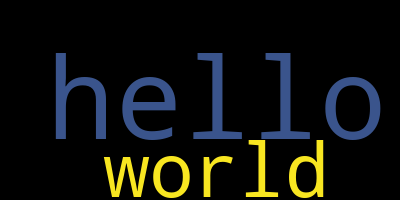

In [75]:
from IPython.display import Image

Image(filename='wordcloud.png')


In [52]:
# 這邊要實戰
import requests as req
import json
import re

#目標網站
url = "https://www.ptt.cc/bbs/miHoYo/search?q=%E5%8E%9F%E7%A5%9E" 
#請求網站
r = req.get(url)
#檢查回應。如果是200則成功請求
print(r)
import bs4
#透過BeautiFul整理且用html.parser解析
root = bs4.BeautifulSoup(r.text,"html.parser")
#找到所有屬性class = "title"
ment = root.find_all("div",class_="title")
#一個一個印出要的資料
for title in ment:
 print(title.a.string)#取得文章標題

 

<Response [200]>
[原神] 關於我卡到BUG被爆雷這檔事(白朮傳說雷)
[原神] 在原神玩鐵道or在鐵道玩原神
[健檢] 原神 抽卡選擇
Re: [原神] 請問你多久沒有上原神了呢
Fw: [閒聊] 原神日區iOS內購價格調整
Re: [原神] 請問你多久沒有上原神了呢
[原神] 花神書後續的活動開啟問題
[原神] 日文版的柯萊的生日信有錯字
[閒聊] 有沒有YTer把原神的故事講得生動有趣
[原神] 甘露花海背後的故事我的理解
Re: [原神] 贈送必勝客兌換碼
Re: [原神] 贈送必勝客兌換碼
[原神] 贈送必勝客兌換碼
[健檢] 原神 白术抽卡請益
[原神] 花靈書打完的感想...
[原神] 爺與雷大砲
[原神] 白朮的聖遺物套裝
Re: [原神] 請問有七聖打NPC專用牌組嗎?
[原神] 請問有七聖打NPC專用牌組嗎?
[健檢] 原神 第二隊


In [53]:
import json

output = []  # 用來存放每篇文章的標題
for title in ment:
    output.append(title.a.string)

# 將結果轉成JSON格式
json_output = json.dumps(output, ensure_ascii=False)

# 寫入檔案
with open('output.json', 'w', encoding='utf-8') as f:
    f.write(json_output)
    
json_output

'["[原神] 關於我卡到BUG被爆雷這檔事(白朮傳說雷)", "[原神] 在原神玩鐵道or在鐵道玩原神", "[健檢] 原神 抽卡選擇", "Re: [原神] 請問你多久沒有上原神了呢", "Fw: [閒聊] 原神日區iOS內購價格調整", "Re: [原神] 請問你多久沒有上原神了呢", "[原神] 花神書後續的活動開啟問題", "[原神] 日文版的柯萊的生日信有錯字", "[閒聊] 有沒有YTer把原神的故事講得生動有趣", "[原神] 甘露花海背後的故事我的理解", "Re: [原神] 贈送必勝客兌換碼", "Re: [原神] 贈送必勝客兌換碼", "[原神] 贈送必勝客兌換碼", "[健檢] 原神 白术抽卡請益", "[原神] 花靈書打完的感想...", "[原神] 爺與雷大砲", "[原神] 白朮的聖遺物套裝", "Re: [原神] 請問有七聖打NPC專用牌組嗎?", "[原神] 請問有七聖打NPC專用牌組嗎?", "[健檢] 原神 第二隊"]'

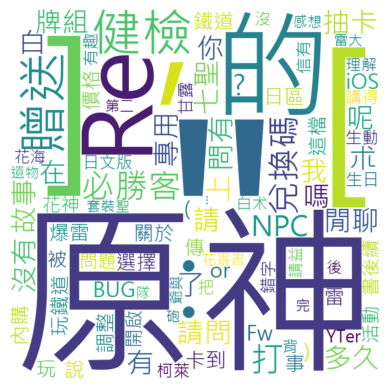

In [54]:
from wordcloud import WordCloud
import jieba

# 讀取檔案內容
with open('output.json', 'r', encoding='utf-8') as f:
    text = f.read()

# 中文分詞
seg_list = jieba.cut(text, cut_all=False)
seg_list = list(seg_list)

# 計算詞頻
word_freq = {}
for word in seg_list:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1


# 產生文字雲
font_path = 'C:/Windows/Fonts/msjh.ttc'  
# 設定字型路徑
wordcloud = WordCloud(width=800, height=800, font_path=font_path, background_color='white').generate_from_frequencies(word_freq)

# 顯示文字雲
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
